In [3]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cleaned_house_sales.csv')
df.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1


Average Time-to-Sale for Different Types of Properties:
      house_type  months_listed
0       Detached       5.876246
1  Semi-detached       5.902857
2       Terraced       6.115267


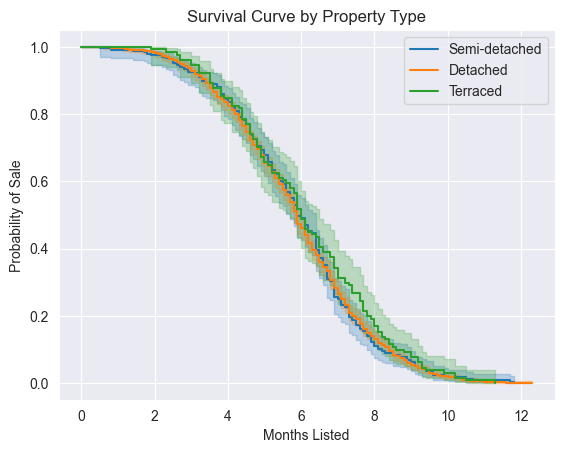

In [4]:
# Time-to-Sale Analysis
time_to_sale = df.groupby('house_type')['months_listed'].mean().reset_index()
print("Average Time-to-Sale for Different Types of Properties:")
print(time_to_sale)

# Kaplan-Meier Estimator
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator for each house type
for house_type in df['house_type'].unique():
    durations = df[df['house_type'] == house_type]['months_listed']
    event_observed = durations.notnull()
    kmf.fit(durations, event_observed=event_observed, label=house_type)
    kmf.plot_survival_function()

plt.title('Survival Curve by Property Type')
plt.xlabel('Months Listed')
plt.ylabel('Probability of Sale')
plt.show()

Property Type Comparison:
              sale_price                     months_listed             
                    mean    median       std          mean median   std
house_type                                                             
Detached       279984.21  274185.5  87177.14          5.88    5.9  1.93
Semi-detached   81416.07   79784.0  24819.59          5.90    5.9  1.94
Terraced        57504.25   56982.0  18591.14          6.12    6.0  1.97


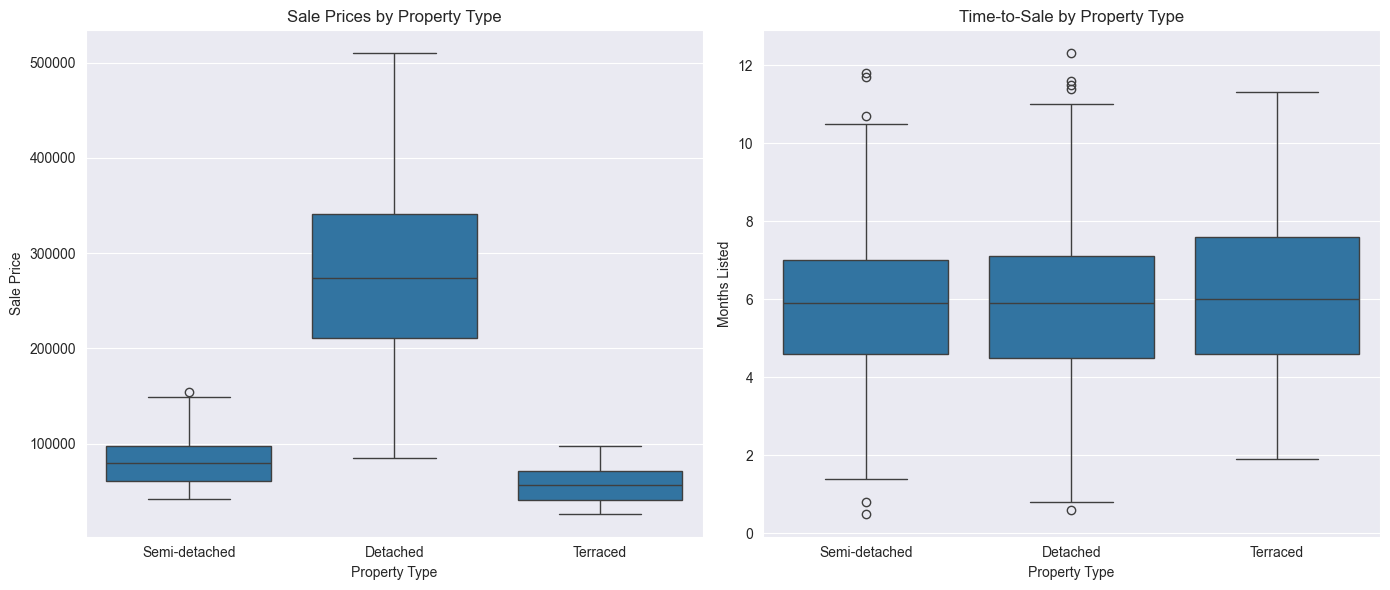

In [5]:
# Property Type Comparison
property_comparison = df.groupby('house_type').agg({'sale_price': ['mean', 'median', 'std'], 'months_listed': ['mean', 'median', 'std']}).round(2)
print("Property Type Comparison:")
print(property_comparison)

# Boxplots and Histograms
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='house_type', y='sale_price', data=df)
sns.color_palette("rocket", as_cmap=True)
plt.title('Sale Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Sale Price')

plt.subplot(1, 2, 2)
sns.boxplot(x='house_type', y='months_listed', data=df)
sns.color_palette("mako", as_cmap=True)
plt.title('Time-to-Sale by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Months Listed')

plt.tight_layout()
plt.show()